In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import pandas as pd
import sqlite3
from scipy.stats import binned_statistic
import rubin_sim.maf as maf


In [11]:

bundleList = []

nside=64
metric = maf.CountMetric(col='night')
for filtername in 'riz':
    sql = 'night < 366 and visitExposureTime < 20 and filter="%s"' % filtername

    slicer = maf.HealpixSlicer(
            nside=nside,
            latCol='altitude',
            lonCol='azimuth',
            useCache=False)
    plotFuncs = [maf.plots.LambertSkyMap()]
    plotDict = {"norm": "log",
               'xlabel': 'N Observations'}

    bundle = maf.MetricBundle(
                metric,
                slicer,
                sql,
                plotFuncs=plotFuncs,
                plotDict=plotDict,
            )
    bundleList.append(bundle)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


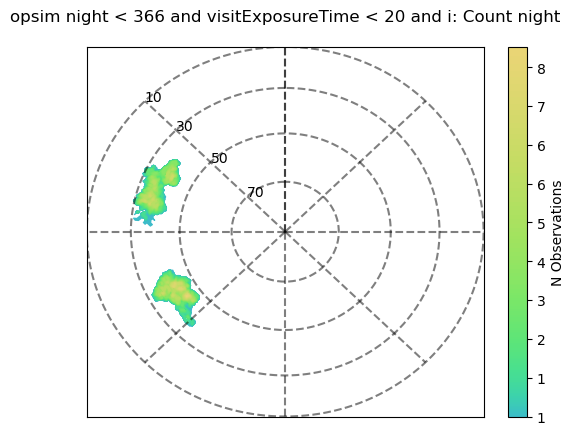

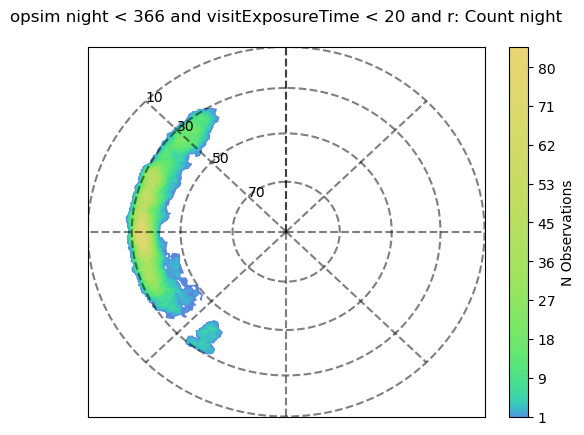

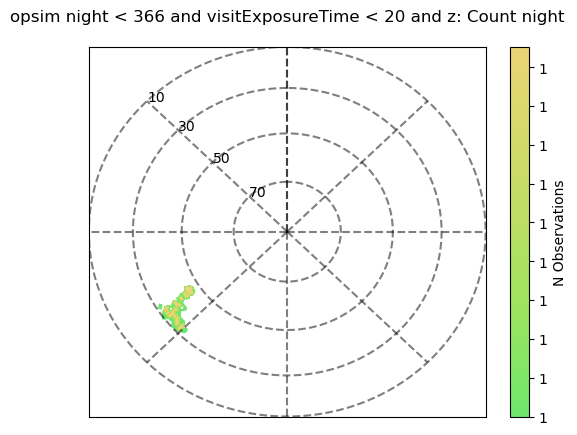

In [12]:
bg = maf.MetricBundleGroup(bundleList, 'draft_connected_v2.99_1yrs.db', 'temp', None)
bg.runAll()
bg.plotAll(closefigs=False)